# Problem Statement
### Use decision trees to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
# importing Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv(r'/Users/ag/Downloads/Fraud_check.csv')

## EDA

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.shape

(600, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## Correlation, Skewness and Kurtosis

In [8]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

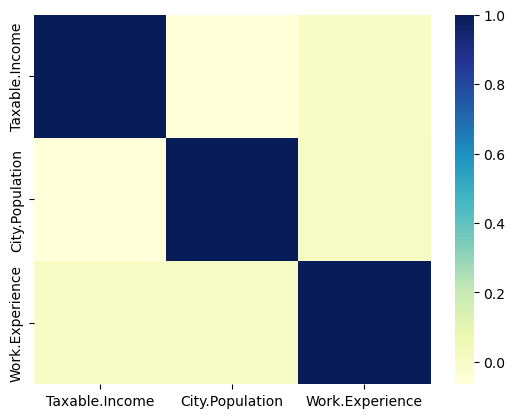

In [9]:
sns.heatmap(df.corr(), cmap="YlGnBu")

In [10]:
df.skew()

/var/folders/09/9skqbfw93w33bh0d34nbxb240000gn/T/ipykernel_7840/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

#### Checked and found that the data is Postively Skewed

In [11]:
df.kurtosis()

/var/folders/09/9skqbfw93w33bh0d34nbxb240000gn/T/ipykernel_7840/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

#### Checked and found that the data has Negative skewness

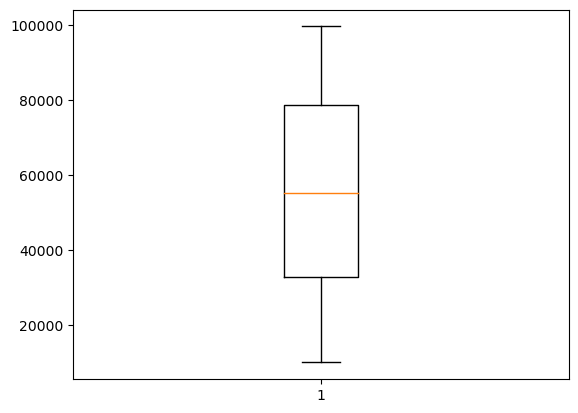

<Figure size 640x480 with 0 Axes>

In [12]:
plt.boxplot(df['Taxable.Income'])
plt.show()
plt.tight_layout()

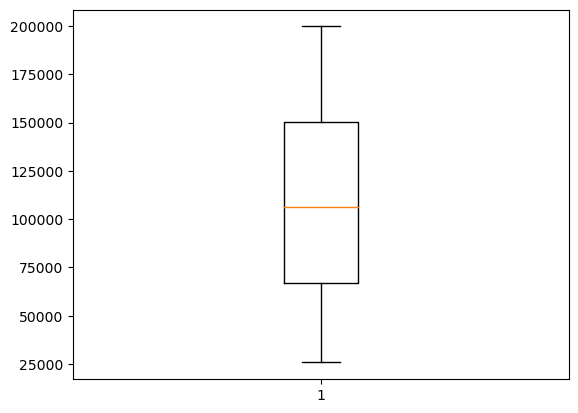

<Figure size 640x480 with 0 Axes>

In [13]:
plt.boxplot(df['City.Population'])
plt.show()
plt.tight_layout()

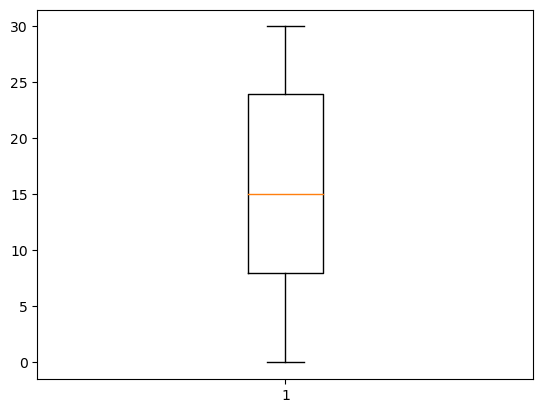

<Figure size 640x480 with 0 Axes>

In [14]:
plt.boxplot(df['Work.Experience'])
plt.show()
plt.tight_layout()

### When plotting a boxplot found not outliers in the data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

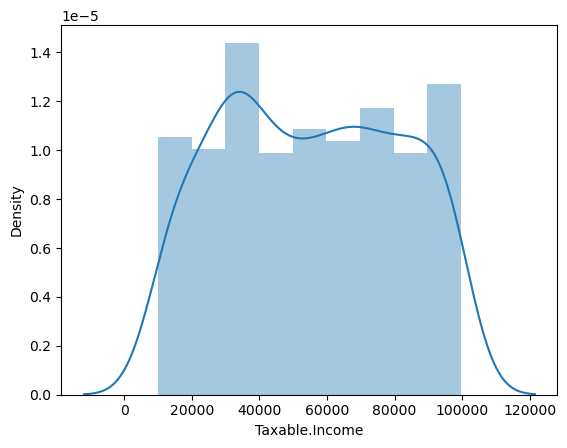

In [15]:
sns.distplot(df['Taxable.Income'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

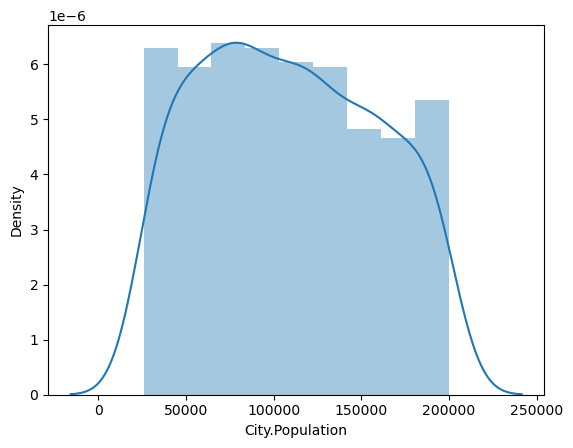

In [16]:
sns.distplot(df['City.Population'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Work.Experience', ylabel='Density'>

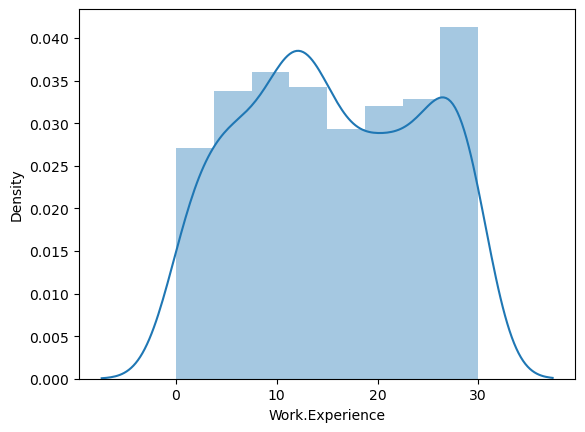

In [17]:
sns.distplot(df['Work.Experience'])

In [18]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


YES    312
NO     288
Name: Undergrad, dtype: int64

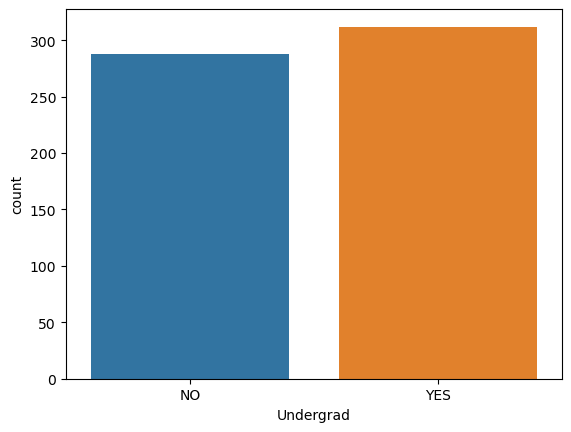

In [19]:
sns.countplot(df['Undergrad'])
df['Undergrad'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

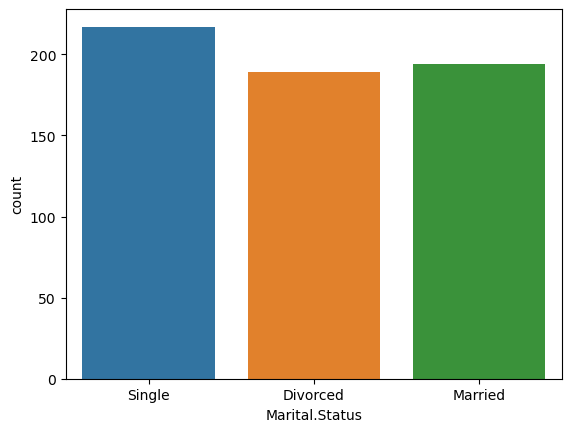

In [20]:
sns.countplot(df['Marital.Status'])
df['Marital.Status'].value_counts()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


YES    302
NO     298
Name: Urban, dtype: int64

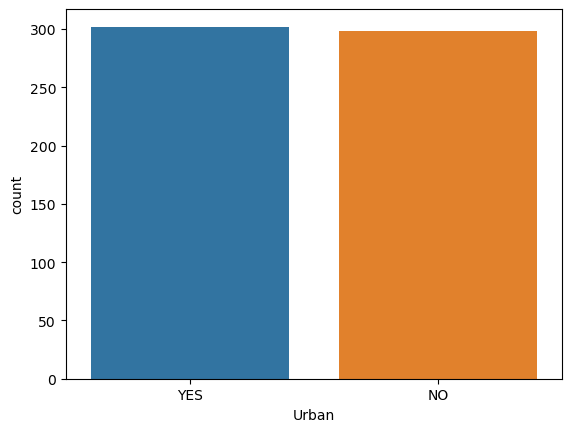

In [21]:
sns.countplot(df['Urban'])
df['Urban'].value_counts()

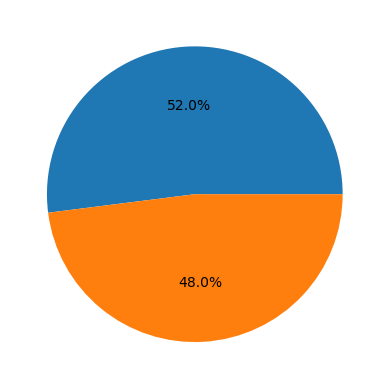

<Figure size 640x480 with 0 Axes>

In [22]:
plt.pie(df['Undergrad'].value_counts(), autopct='%1.1f%%')
plt.show()
plt.tight_layout()

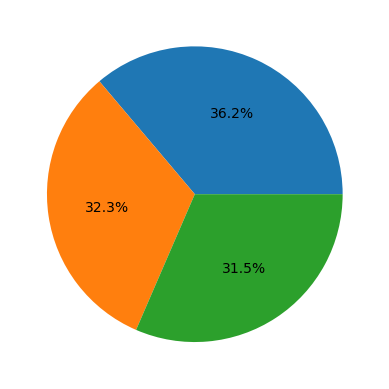

<Figure size 640x480 with 0 Axes>

In [23]:
plt.pie(df['Marital.Status'].value_counts(), autopct='%1.1f%%')
plt.show()
plt.tight_layout()

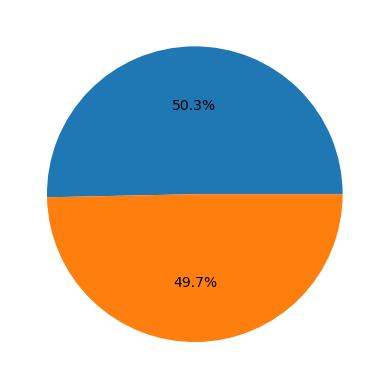

<Figure size 640x480 with 0 Axes>

In [24]:
plt.pie(df['Urban'].value_counts(), autopct='%1.1f%%')
plt.show()
plt.tight_layout()

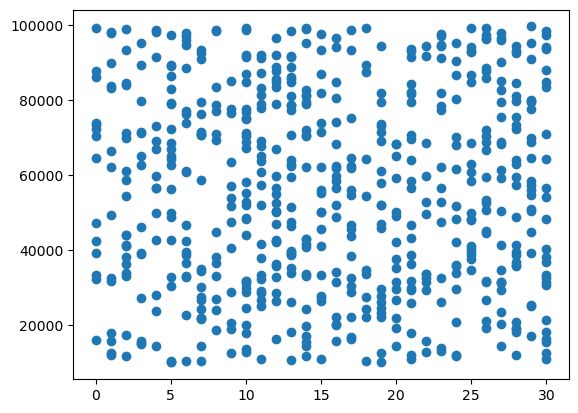

In [25]:
# checking the relatioinship between target and other variables
plt.scatter('Work.Experience','Taxable.Income', data=df)

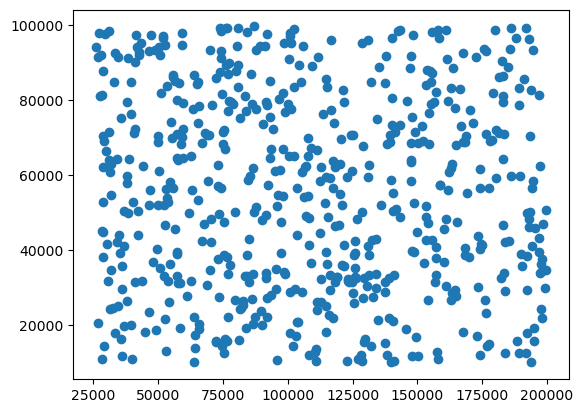

In [26]:
# checking the relatioinship between target and other variables
plt.scatter('City.Population','Taxable.Income', data=df)

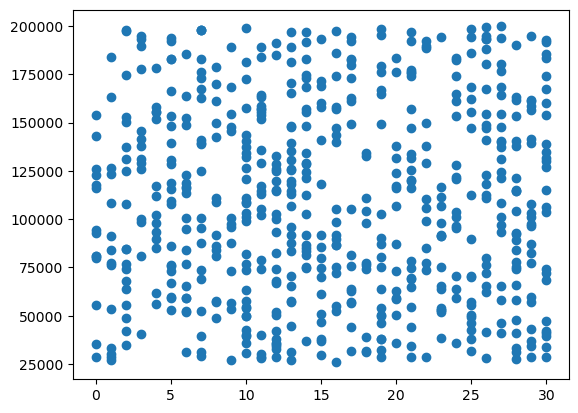

In [27]:
plt.scatter('Work.Experience','City.Population', data=df)

<AxesSubplot:xlabel='Marital.Status', ylabel='Undergrad'>

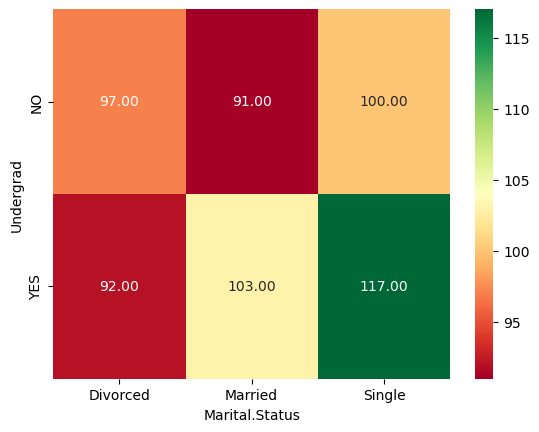

In [28]:
sns.heatmap(pd.crosstab(df['Undergrad'], df['Marital.Status']), annot=True, fmt='.2f', cmap='RdYlGn')

<AxesSubplot:xlabel='Urban', ylabel='Undergrad'>

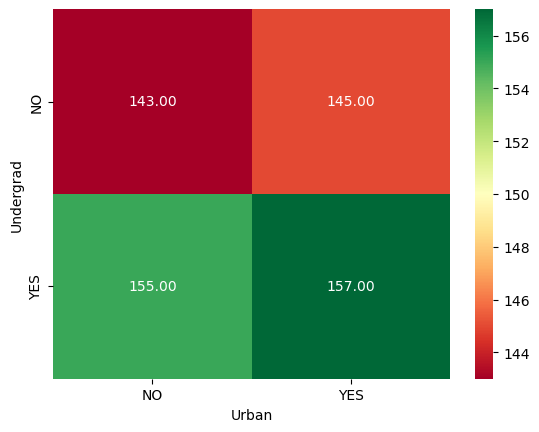

In [29]:
sns.heatmap(pd.crosstab(df['Undergrad'], df['Urban']),annot=True, fmt='.2f', cmap='RdYlGn')

<AxesSubplot:xlabel='Urban', ylabel='Marital.Status'>

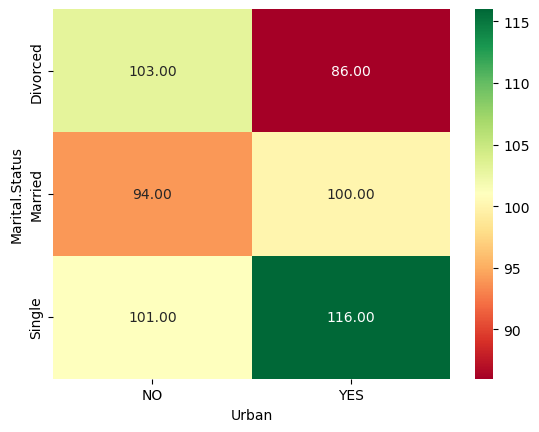

In [30]:
sns.heatmap(pd.crosstab(df['Marital.Status'], df['Urban']), annot=True, fmt='.2f', cmap='RdYlGn')

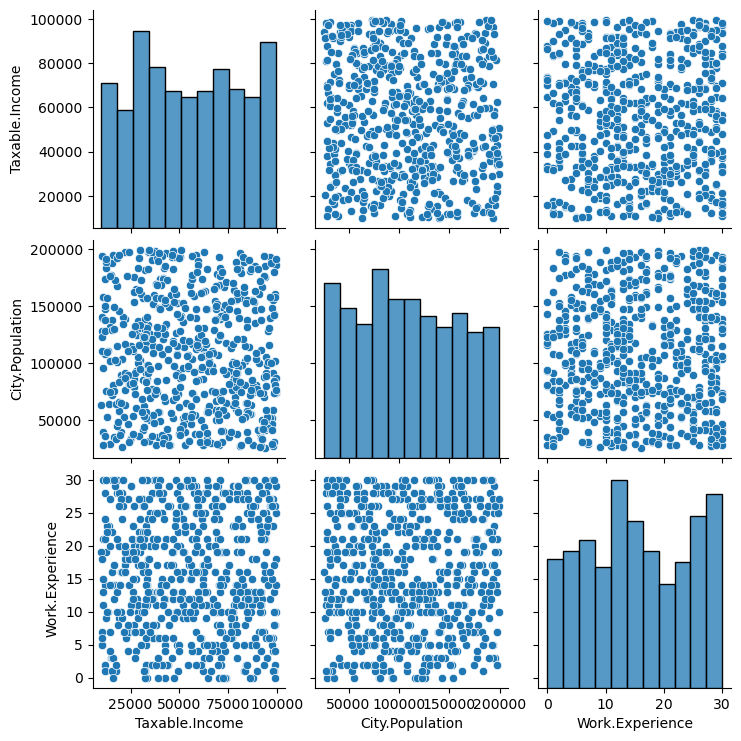

In [31]:
sns.pairplot(df)

In [32]:
# Checking Missing values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [33]:
df1 = pd.get_dummies(df, drop_first=True)

In [34]:
df1.shape

(600, 7)

In [35]:
def Analysis(value):
    if value <= 30000:
        return ('Risky')
    else:
        return ('Good')
df1['Analysis'] = df1['Taxable.Income'].apply(Analysis)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Analysis', ylabel='count'>

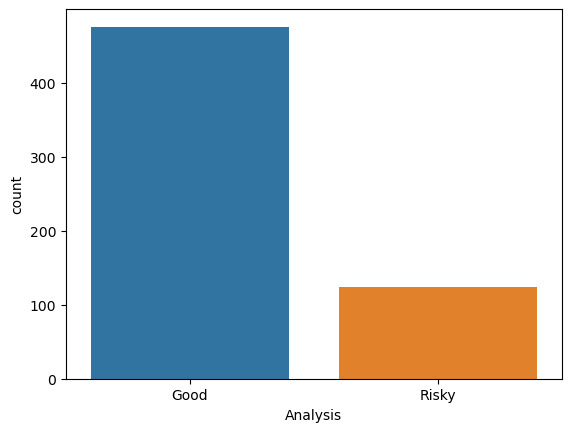

In [36]:
df1['Analysis'].value_counts()
sns.countplot(df1['Analysis'])

In [37]:
df1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Analysis
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [38]:
df1.drop(columns=['Taxable.Income'], inplace=True)

In [39]:
X = df1.drop(columns=['Analysis'])
y = df1.Analysis

In [40]:
scaled = StandardScaler()

In [41]:
X_scaled = scaled.fit_transform(X)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.22, random_state=42)

In [43]:
len(X_train)

468

In [44]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [46]:
y_pred = model.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[103,   1],
       [ 27,   1]])

In [48]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


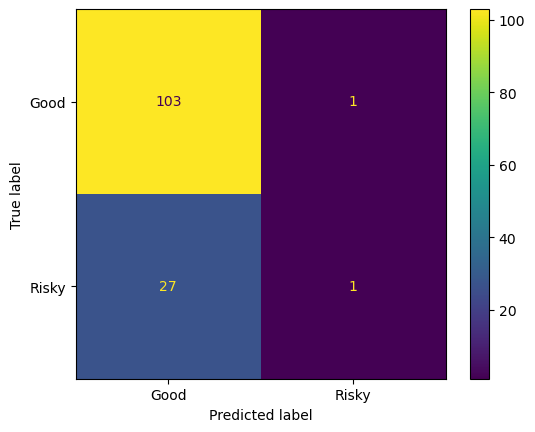

In [49]:
plot_confusion_matrix(model, X_test,y_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.79      0.99      0.88       104
       Risky       0.50      0.04      0.07        28

    accuracy                           0.79       132
   macro avg       0.65      0.51      0.47       132
weighted avg       0.73      0.79      0.71       132



In [51]:
from sklearn.tree import plot_tree

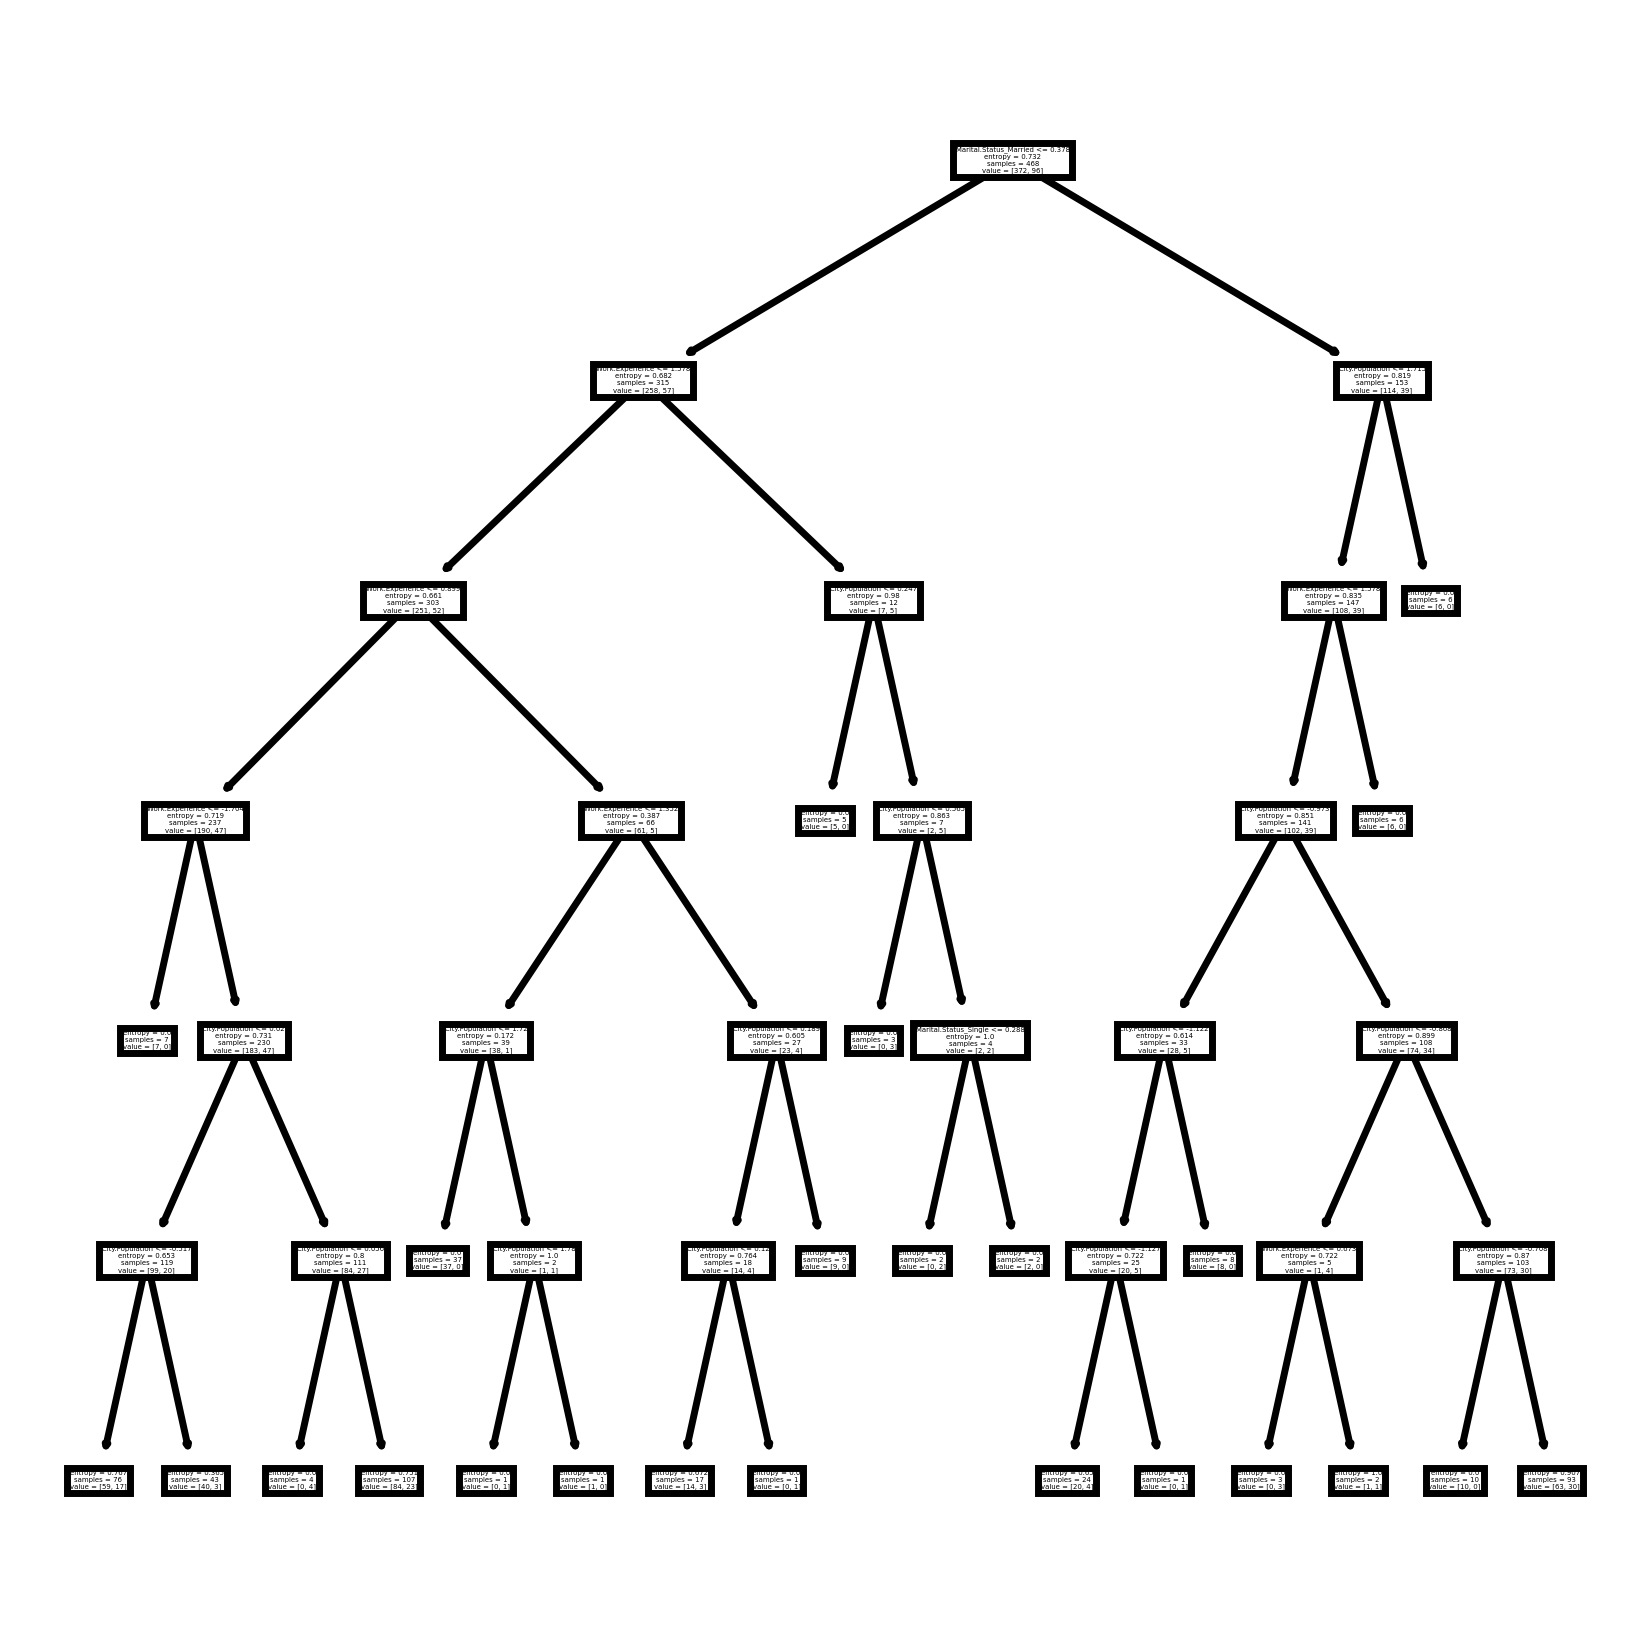

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [52]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
plot_tree(model,feature_names=df1.columns)
plt.show()
plt.tight_layout

In [53]:
model.score(X_test, y_test)

0.7878787878787878

In [54]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [55]:
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [56]:
y_pred = model1.predict(X_test)

In [57]:
confusion_matrix(y_test, y_pred)

array([[96,  8],
       [28,  0]])

In [58]:
from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


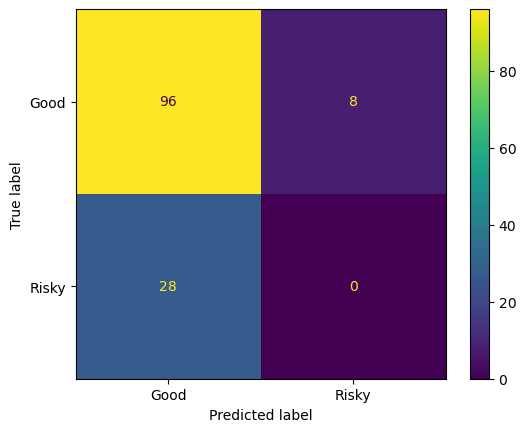

In [59]:
plot_confusion_matrix(model1, X_test,y_test)

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       0.77      0.92      0.84       104
       Risky       0.00      0.00      0.00        28

    accuracy                           0.73       132
   macro avg       0.39      0.46      0.42       132
weighted avg       0.61      0.73      0.66       132



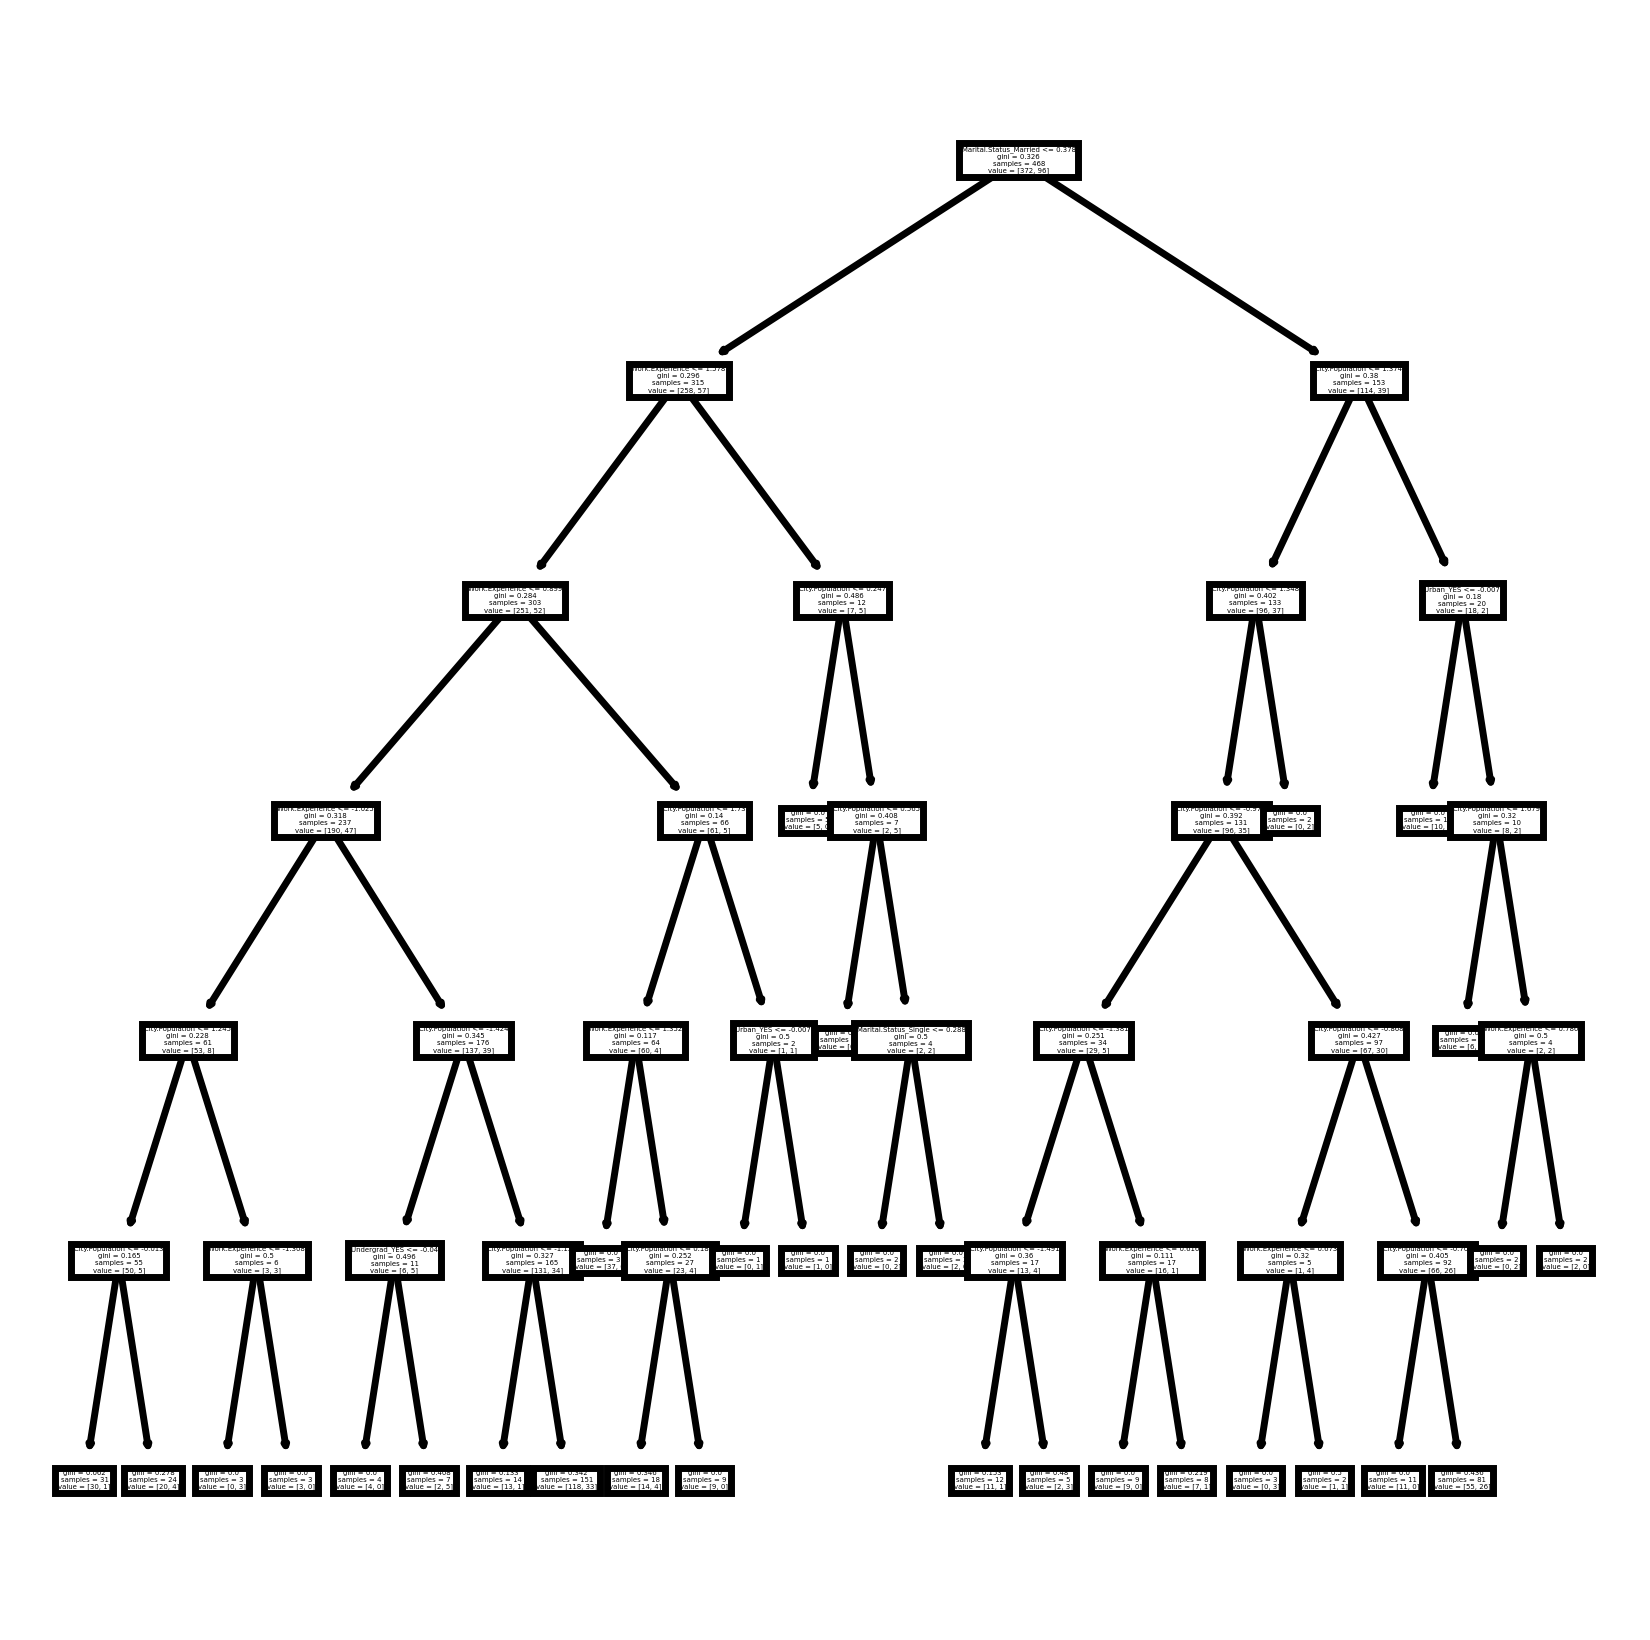

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [61]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
plot_tree(model1,feature_names=df1.columns)
plt.show()
plt.tight_layout

In [62]:
model1.score(X_test, y_test)

0.7272727272727273

## Summary
#### when created a model using Entrophy as criterion it resulted in an accuracy score 78%
#### when created a model using Gini as criterion it resulted in accuracy score od 73%